<a href="https://colab.research.google.com/github/lacastrilp/IA_8608/blob/main/IA_First_Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Examen Parcial I: Introducción a la Inteligencia Artificial**

## **Integrantes:**
* Luis ALejandro Castrillón Pulgarín
  * **ID EPIK:** 1000330339
* Juan Young Hoyos
  * **ID EPIK:** 1000337497
* Jaider España Paternina
  * **ID EPIK:** 1000137903

# **Instrucciones Generales**
  * El examen debe ser resuelto en equipos de **tres (3) personas**.
  * El lenguaje de trabajo exclusivo es **Python**.
  * La entrega se realizará a través de un **Notebook de Google Colab** (preferiblemente) o un **enlace a un repositorio de GitHub** que contenga el Notebook.
  * Asegúrense de que el enlace sea público o que se otorgue acceso al profesor para la calificación. También se requiere, un **archivo PDF** generado a partir del Notebook  de Colab o de GitHub, que sirva como documento formal del examen. Este PDF debe ser legible y contener todo el contenido del Notebook.
  * Todos los datos utilizados en los ejercicios deben ser **accesibles públicamente** a través de una API, URL directa o repositorios de datos públicos conocidos (ej. Kaggle, UCI Machine Learning Repository, etc.). Aseguren que los datos sean fácilmente descargables y utilizables.(Aplica solamente para datos externos)
  * El Notebook debe estar **bien comentado**, incluyendo explicaciones claras de cada sección de código, la lógica aplicada, las decisiones tomadas y los resultados obtenidos.
  * Se valorará la **elegancia y claridad** en el código, así como en la presentación de
 los resultados y las justificaciones




# **Ejercicio 1: Algoritmo de Búsqueda (25%)**
---
## **Problema de Rutas de Entrega de Proteínas**
Una empresa de biotecnología necesita optimizar la entrega de diferentes proteínas a laboratorios de investigación en varias ciudades. Las proteínas deben transportarse desde una central de producción a diferentes destinos, minimizando la distancia total recorrida. Se tiene una red de ciudades y las distancias entre ellas. Su tarea es encontrar la ruta más corta para una entrega específica.

 1. **Definición del Grafo y Datos:** Consideren el siguiente conjunto de ciudades (nodos) y las distancias (aristas) entre ellas como un grafo no dirigido.

* **Nodos (Ciudades):**  
  * **A** (Almacén Central)
  * **B** (Biolab Norte)
  * **C** (Centro de Investigación)
  * **D** (Desarrollo Farmacéutico)
  * **E** (Estación Experimental)
  * **F** (Fábrica Piloto)
  * **G** (Genómica Avanzada)

* **Aristas (Distancias en km):**
 * **A - B:** 10
 * **A - C:** 15
 * **B - D:** 12
 * **C - E:** 18
 * **D - F:** 8
 * **E - F:** 5
 * **F - G:** 20
 * **C - G:** 25
 * **B - E:** 7

2. **Tarea:**
  * **Representación y Visualización:** Dibujen el grafo utilizando una librería de Python (ej. ‘networkx‘ y ‘matplotlib‘). Los nodos deben estar etiquetados y las aristas deben mostrar los pesos (distancias).
  * **Algoritmo de Búsqueda:** Implementen y apliquen un algoritmo de búsqueda (ej. Dijkstra o A*) para encontrar la ruta más corta desde el Almacén Central (A) hasta el laboratorio de Genómica Avanzada (G).
  * **Resultados:** Muestren la ruta más corta encontrada y la distancia total calculada.

3. **Preguntas Analíticas:**
 * Expliquen brevemente por qué el algoritmo elegido es adecuado para este prblema.
 * ¿Qué ventajas o desventajas tendría el uso de un algoritmo de búsqueda diferente (ej. BFS o DFS) para encontrar la ruta más corta en este escenario
* **RESPUESTA:**

  1. **BFS**

    * En este caso los pesos son distintos, por lo que BFS no puede garantizar la ruta de menor distancia real, solo encontraría el camino con menos saltos (número de aristas).

  2. **DFS**

    * No garantiza rutas mínimas. Podría terminar recorriendo un camino mucho más largo antes de encontrar el correcto. Además, puede ser ineficiente en grafos grandes porque explora en profundidad sin optimización.

  3. **A***
    * Sin coordenadas u otra forma de calcular un h(n) razonable, A* se reduce básicamente a Dijkstra.


Ruta más corta: A → C → B → D → E → G
Distancia total: 13


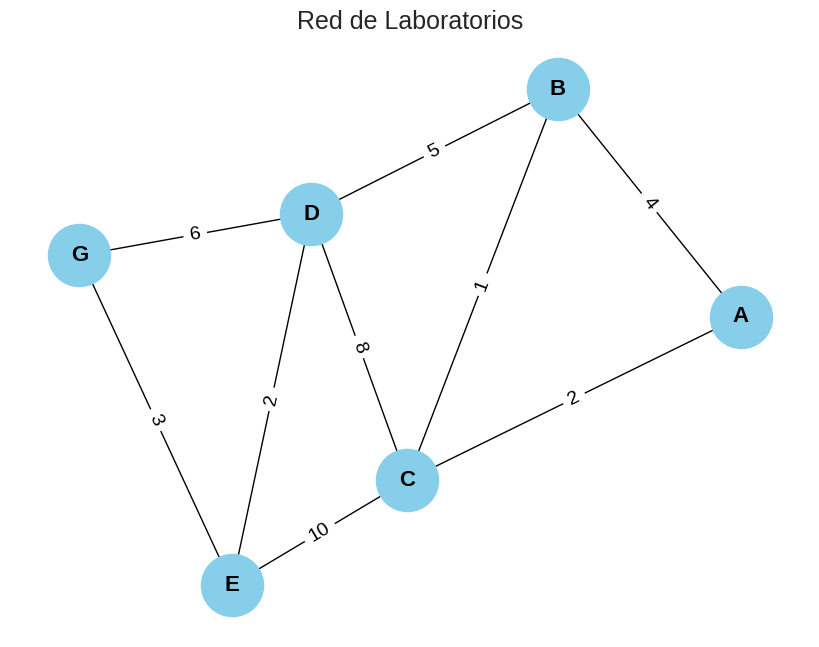

In [20]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Grafo (ejemplo)
grafo = {
  'A': {'B': 4, 'C': 2},
  'B': {'A': 4, 'C': 1, 'D': 5},
  'C': {'A': 2, 'B': 1, 'D': 8, 'E': 10},
  'D': {'B': 5, 'C': 8, 'E': 2, 'G': 6},
  'E': {'C': 10, 'D': 2, 'G': 3},
  'G': {'D': 6, 'E': 3}
}

# Dijkstra
def dijkstra(grafo, inicio, fin):
    distancias = {nodo: float('inf') for nodo in grafo}
    distancias[inicio] = 0
    previos = {nodo: None for nodo in grafo}

    heap = [(0, inicio)]  # (distancia, nodo)

    while heap:
        distancia_actual, nodo_actual = heapq.heappop(heap)

        if distancia_actual > distancias[nodo_actual]:
            continue

        for vecino, peso in grafo[nodo_actual].items():
            nueva_dist = distancia_actual + peso
            if nueva_dist < distancias[vecino]:
                distancias[vecino] = nueva_dist
                previos[vecino] = nodo_actual
                heapq.heappush(heap, (nueva_dist, vecino))

    # --- Reconstruir camino ---
    camino = []
    nodo = fin
    while nodo is not None:
        camino.insert(0, nodo)
        nodo = previos[nodo]

    return camino, distancias[fin]

# Llamar función
camino, distancia_total = dijkstra(grafo, 'A', 'G')

print("Ruta más corta:", " → ".join(camino))
print("Distancia total:", distancia_total)

# --- Dibujar el grafo ---
G = nx.Graph()
for nodo, conexiones in grafo.items():
    for vecino, peso in conexiones.items():
        G.add_edge(nodo, vecino, weight=peso)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))

nx.draw(G, pos, with_labels=True, node_color="skyblue",
        node_size=2000, font_size=16, font_weight='bold')

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=14)

plt.title("Red de Laboratorios", fontsize=18)
plt.show()


# **Ejercicio 2: Clasificación con Base de Datos Interna (35%)**
---

## **Análisis de Calidad de Aguas**
Utilicen un conjunto de datos público disponible en Python para un problema de clasificación (ej. ‘scikit-learn.datasets‘ pero **NO Iris ni Wine**). Se recomienda el dataset **Breast Cancer Wisconsin (Diagnostic) Dataset** de ‘sklearn.datasets‘ o el dataset **Diabetes Dataset** para un problema de clasificación binaria o multiclase. Para este ejercicio, se sugiere enfáticamente el dataset de Cáncer de Mama si buscan un problema de clasificación binaria claro



1. **Selección y Carga de Datos:**
  * Elijan un dataset de ‘sklearn.datasets‘ (distinto de Iris y Wine). Indiquen claramente cuál es el dataset seleccionado y carguen los datos.
  * Describan brevemente el dataset: número de instancias, número de caracterís
  ticas, y la naturaleza de la variable objetivo



In [ ]:
import pandas as pd  # Para manejo de tablas like excel
import numpy as np # Para calculos matematicos y algebraicos
import scipy as sp # Para analisis estadisticos y modelos estadisticos
import matplotlib.pyplot as plt  # Para Graficar
# import sklearn as sk  # Para ML inicial
from sklearn.model_selection import train_test_split # Inicio de CrossValidation
from sklearn.tree import DecisionTreeClassifier # Arbol de decision
from sklearn.neighbors import KNeighborsClassifier # Kvecinos
from sklearn.svm import SVC # Support Vector classiier
from sklearn.linear_model import LogisticRegression # Regresion logistica
from sklearn.metrics import accuracy_score # Medida 01
from sklearn.datasets import load_breast_cancer # Base de datos
from matplotlib.colors import ListedColormap # personalizacion plot
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve


# --- 1. Cargar el dataset de breast_cancer y mostrar etiquetas ---
breast_cancer = load_breast_cancer()
X = breast_cancer.data  # Características (medidas)
y = breast_cancer.target # Etiquetas numéricas (0: malignant, 1: benign)
feature_names = breast_cancer.feature_names # Nombres de las características
target_names = breast_cancer.target_names # ['malignant', 'benign']

print("Breast Cancer\n")
print(f"Numero de instancias: {X.shape[0]}")
print(f"Numero de caracteristicas: {X.shape[1]}")
print(f"Caracteristicas: {list(feature_names)}\n")
print(f"Variable objetivo con clases: {list(target_names)}\n")

print("--- Etiquetas de los tipos de breast_cancer ---")
for i, name in enumerate(target_names):
  print(f"Etiqueta numérica {i}: {name}")
print("\n")

Breast Cancer

Numero de instancias: 569
Numero de caracteristicas: 30
Caracteristicas: [np.str_('mean radius'), np.str_('mean texture'), np.str_('mean perimeter'), np.str_('mean area'), np.str_('mean smoothness'), np.str_('mean compactness'), np.str_('mean concavity'), np.str_('mean concave points'), np.str_('mean symmetry'), np.str_('mean fractal dimension'), np.str_('radius error'), np.str_('texture error'), np.str_('perimeter error'), np.str_('area error'), np.str_('smoothness error'), np.str_('compactness error'), np.str_('concavity error'), np.str_('concave points error'), np.str_('symmetry error'), np.str_('fractal dimension error'), np.str_('worst radius'), np.str_('worst texture'), np.str_('worst perimeter'), np.str_('worst area'), np.str_('worst smoothness'), np.str_('worst compactness'), np.str_('worst concavity'), np.str_('worst concave points'), np.str_('worst symmetry'), np.str_('worst fractal dimension')]

Variable objetivo con clases: [np.str_('malignant'), np.str_('ben

2. **Preprocesamiento:**
  * Dividan el dataset en conjuntos de entrenamiento y validación (ej. 70% entre
  namiento, 30% validación).
  * Realicen cualquier preprocesamiento necesario (ej. escalado de características si los modelos lo requieren, manejo de valores nulos si los hay, aunque los datasets de sklearn suelen estar limpios). Justifiquen las decisiones de preprocesamiento.
    * **RESPUESTA:** **kNN**, **SVC** ya que usan distancias para separar clases. **Regresión logística** se beneficia del escalado para mejorar la convergencia numerica en optimización. En conclusion necesitan escalado porque dependen de distancias o valores numéricos en diferentes escalas.


In [ ]:
import pandas as pd  # Para manejo de tablas like excel
import numpy as np # Para calculos matematicos y algebraicos
import scipy as sp # Para analisis estadisticos y modelos estadisticos
import matplotlib.pyplot as plt  # Para Graficar
# import sklearn as sk  # Para ML inicial
from sklearn.model_selection import train_test_split # Inicio de CrossValidation
from sklearn.tree import DecisionTreeClassifier # Arbol de decision
from sklearn.neighbors import KNeighborsClassifier # Kvecinos
from sklearn.svm import SVC # Support Vector classiier
from sklearn.linear_model import LogisticRegression # Regresion logistica
from sklearn.metrics import accuracy_score # Medida 01
from sklearn.datasets import load_breast_cancer # Base de datos
from matplotlib.colors import ListedColormap # personalizacion plot
from sklearn.preprocessing import StandardScaler

# --- 1. Cargar el dataset de breast_cancer y mostrar etiquetas ---
breast_cancer = load_breast_cancer()
X = breast_cancer.data  # Características (medidas)
y = breast_cancer.target # Etiquetas numéricas (0: malignant, 1: benign)
feature_names = breast_cancer.feature_names # Nombres de las características
target_names = breast_cancer.target_names # Nombres de las especies

print("--- Etiquetas de los tipos de breast_cancer ---")
for i, name in enumerate(target_names):
  print(f"Etiqueta numérica {i}: {name}")
print("\n")

# --- 2. Dividir en entrenamiento y validación ---
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 3. Escalado de características ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

--- Etiquetas de los tipos de breast_cancer ---
Etiqueta numérica 0: malignant
Etiqueta numérica 1: benign




3. **Construcción de Clasificadores:**
  * Construyan al menos 3 modelos de clasificación diferentes (ej. Regresión Logística, Árbol de Decisión, SVM, K-Nearest Neighbors, Random Forest, Nai
  ve Bayes).
  * Entrenen cada modelo con los datos de entrenamiento.


In [ ]:
import pandas as pd  # Para manejo de tablas like excel
import numpy as np # Para calculos matematicos y algebraicos
import scipy as sp # Para analisis estadisticos y modelos estadisticos
import matplotlib.pyplot as plt  # Para Graficar
# import sklearn as sk  # Para ML inicial
from sklearn.model_selection import train_test_split # Inicio de CrossValidation
from sklearn.tree import DecisionTreeClassifier # Arbol de decision
from sklearn.neighbors import KNeighborsClassifier # Kvecinos
from sklearn.svm import SVC # Support Vector classiier
from sklearn.linear_model import LogisticRegression # Regresion logistica
from sklearn.metrics import accuracy_score # Medida 01
from sklearn.datasets import load_breast_cancer # Base de datos
from matplotlib.colors import ListedColormap # personalizacion plot
from sklearn.preprocessing import StandardScaler

# --- 1. Cargar el dataset de breast_cancer y mostrar etiquetas ---
breast_cancer = load_breast_cancer()
X = breast_cancer.data  # Características (medidas)
y = breast_cancer.target # Etiquetas numéricas (0: malignant, 1: benign)
feature_names = breast_cancer.feature_names # Nombres de las características
target_names = breast_cancer.target_names # Nombres de las especies

print("--- Etiquetas de los tipos de breast_cancer ---")
for i, name in enumerate(target_names):
  print(f"Etiqueta numérica {i}: {name}")
print("\n")

# --- 2. Dividir en entrenamiento y validación ---
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 3. Escalado de características ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Entrenar y Evaluar Múltiples Modelos ---

# Diccionario de modelos para facilitar la iteración
models = {
  "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
  "K-Vecinos Cercanos (KNN)": KNeighborsClassifier(n_neighbors=3), # n_neighbors es el número de vecinos a considerar
  "Máquina de Vectores de Soporte (SVC)": SVC(kernel='rbf', gamma='auto', random_state=42, probability=True), # 'rbf' para un kernel no lineal
  "Regresión Logística": LogisticRegression(max_iter=200, random_state=42) # max_iter para asegurar convergencia
}

results = []

print("--- Evaluación de Múltiples Modelos de Clasificación ---")
for name, model in models.items():
  if name == "Árbol de Decisión":
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
  else:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

--- Etiquetas de los tipos de breast_cancer ---
Etiqueta numérica 0: malignant
Etiqueta numérica 1: benign


--- Evaluación de Múltiples Modelos de Clasificación ---


4. **Evaluación de Desempeño:**
  * Evalúen cada modelo utilizando al menos 3 medidas de desempeño rele
  vantes para clasificación (ej. Precisión (Accuracy), Recall, F1-Score, Matriz de Confusión, Curva ROC/AUC).
  * Presenten los resultados de las métricas de forma clara (tablas, gráficos).


--- Etiquetas de los tipos de breast_cancer ---
Etiqueta numérica 0: malignant
Etiqueta numérica 1: benign


--- Evaluación de Múltiples Modelos de Clasificación ---


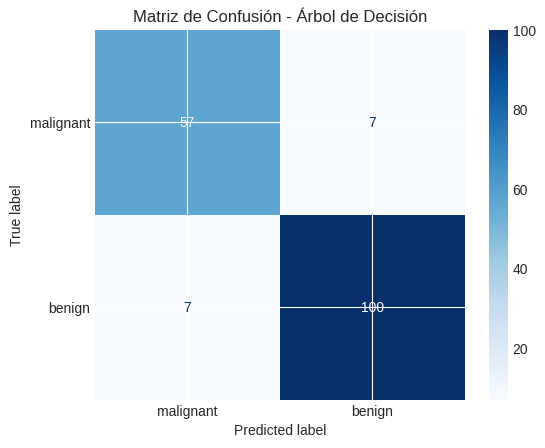


Reporte de Clasificacion - Árbol de Decisión
              precision    recall  f1-score   support

   malignant       0.89      0.89      0.89        64
      benign       0.93      0.93      0.93       107

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



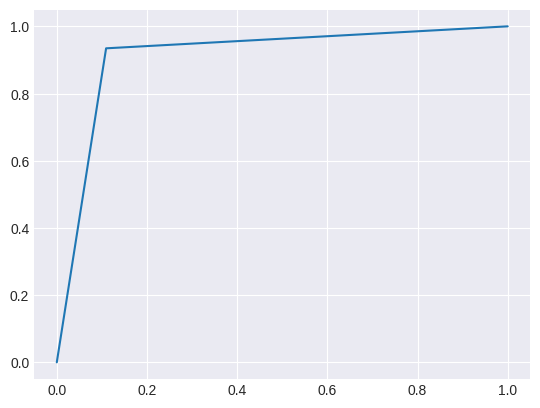

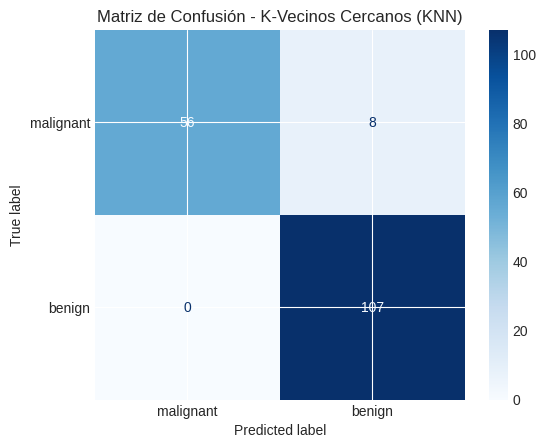


Reporte de Clasificacion - K-Vecinos Cercanos (KNN)
              precision    recall  f1-score   support

   malignant       1.00      0.88      0.93        64
      benign       0.93      1.00      0.96       107

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



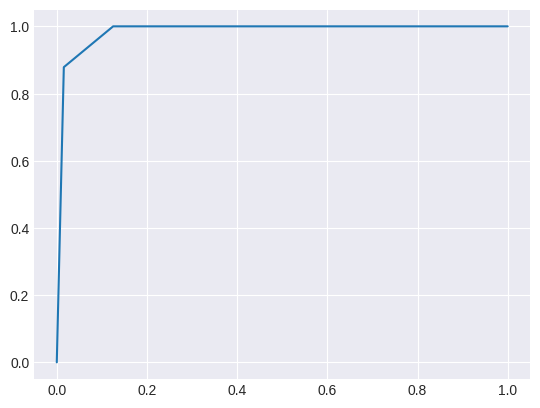

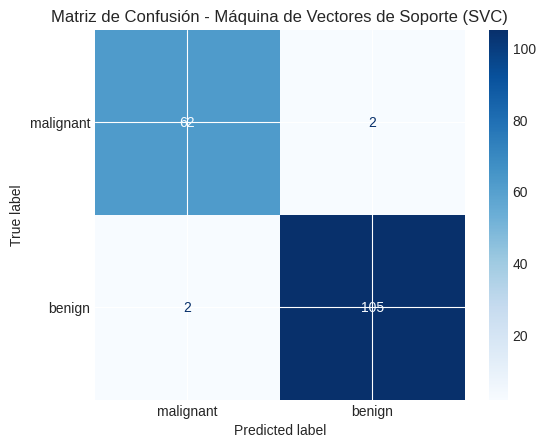


Reporte de Clasificacion - Máquina de Vectores de Soporte (SVC)
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



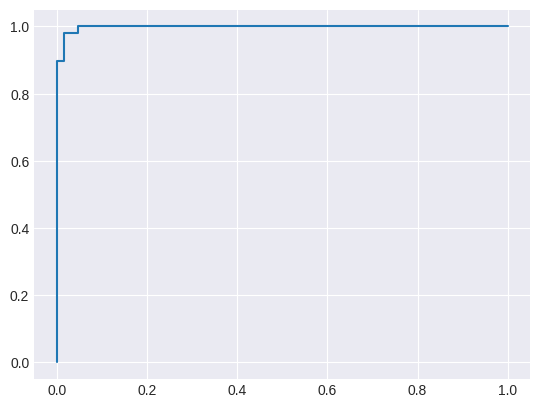

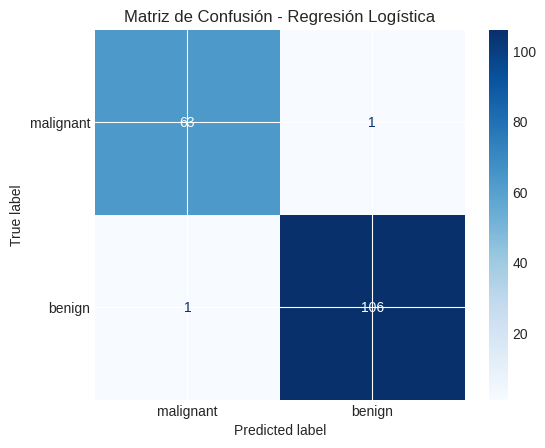


Reporte de Clasificacion - Regresión Logística
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



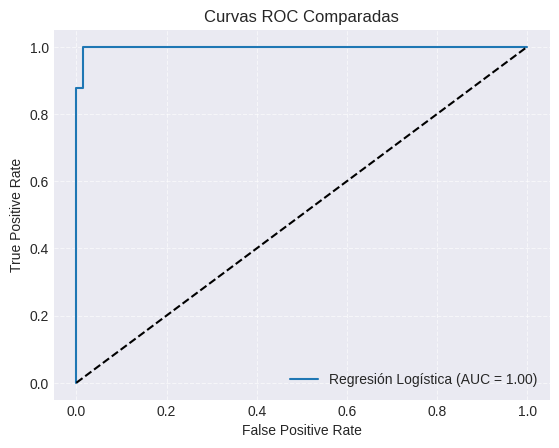


Resultados de Accuracy por Modelo:
                                 Modelo  Accuracy
0                     Árbol de Decisión  0.918129
1              K-Vecinos Cercanos (KNN)  0.953216
2  Máquina de Vectores de Soporte (SVC)  0.976608
3                   Regresión Logística  0.988304


In [ ]:
import pandas as pd  # Para manejo de tablas like excel
import numpy as np # Para calculos matematicos y algebraicos
import scipy as sp # Para analisis estadisticos y modelos estadisticos
import matplotlib.pyplot as plt  # Para Graficar
# import sklearn as sk  # Para ML inicial
from sklearn.model_selection import train_test_split # Inicio de CrossValidation
from sklearn.tree import DecisionTreeClassifier # Arbol de decision
from sklearn.neighbors import KNeighborsClassifier # Kvecinos
from sklearn.svm import SVC # Support Vector classiier
from sklearn.linear_model import LogisticRegression # Regresion logistica
from sklearn.metrics import accuracy_score # Medida 01
from sklearn.datasets import load_breast_cancer # Base de datos
from matplotlib.colors import ListedColormap # personalizacion plot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# --- 1. Cargar el dataset de breast_cancer y mostrar etiquetas ---
breast_cancer = load_breast_cancer()
X = breast_cancer.data  # Características (medidas)
y = breast_cancer.target # Etiquetas numéricas (0: malignant, 1: benign)
feature_names = breast_cancer.feature_names # Nombres de las características
target_names = breast_cancer.target_names # Nombres de las especies

print("--- Etiquetas de los tipos de breast_cancer ---")
for i, name in enumerate(target_names):
  print(f"Etiqueta numérica {i}: {name}")
print("\n")

# --- 2. Dividir en entrenamiento y validación ---
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 3. Escalado de características ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Entrenar y Evaluar Múltiples Modelos ---

# Diccionario de modelos para facilitar la iteración
models = {
  "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
  "K-Vecinos Cercanos (KNN)": KNeighborsClassifier(n_neighbors=3), # n_neighbors es el número de vecinos a considerar
  "Máquina de Vectores de Soporte (SVC)": SVC(kernel='rbf', gamma='auto', random_state=42, probability=True), # 'rbf' para un kernel no lineal
  "Regresión Logística": LogisticRegression(max_iter=200, random_state=42) # max_iter para asegurar convergencia
}

results = []

print("--- Evaluación de Múltiples Modelos de Clasificación ---")
for name, model in models.items():
  if name == "Árbol de Decisión":
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
  else:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)



  # Accuracy
  acc = accuracy_score(y_test, y_pred)

  # Matriz de confusion
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
  disp.plot(cmap=plt.cm.Blues)
  plt.title(f"Matriz de Confusión - {name}")
  plt.show()

  # Reporte (Precision, Recall, F1)
  print(f"\nReporte de Clasificacion - {name}")
  print(classification_report(y_test, y_pred, target_names=target_names))

  # Guardar resultados
  results.append({"Modelo": name, "Accuracy": acc})

  # Curva ROC
  if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test_scaled if name != "Árbol de Decisión" else X_test)[:, 1]
  else:
    y_proba = model.decision_function(X_test_scaled if name != "Árbol de Decisión" else X_test)
    y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

  fpr, tpr, _ = roc_curve(y_test, y_proba)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")


# Mostrar comparacion ROC
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC Comparadas")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# --- 6. Tabla de Resultados ---
results_df = pd.DataFrame(results)
print("\nResultados de Accuracy por Modelo:")
print(results_df)

5. Análisis y Justificación:
  * Comparen el desempeño de los 3 modelos.
  * Justifiquen cuál fue el mejor modelo para este problema y por qué, basándose en las métricas de desempeño y en las características de los modelos.

  **RESPUESTA:**

    * **Árbol de Decisión:**  0.918129, buen desempeño pero mas bajo que los demas; puede sobreajustar si no se poda adecuadamente
    * **K-Vecinos Cercanos (KNN):**  0.953216, alta precisión, pero el recall en la clase malignant fue de 0.88 (riesgoso en un problema medico, pues significa falsos negativos).
    * **Máquina de Vectores de Soporte (SVC):**  0.976608, buen balance entre clases, muy robusto al sobreajuste y adecuado para alta dimensionalidad.
    * **Regresión Logística:**  0.988304, el mejor modelo en todas las metricas. Interpretable, estable y con desempeño casi perfecto.


  * **Preguntas Conceptuales y Analíticas Adicionales:**
    * ¿Qué es el overfitting y el underfitting? ¿Cómo se podrían detectar y mitigar en el contexto de los modelos que construyeron?
    
  **RESPUESTA:**

    * **Overfitting (Sobreajuste):**
      Pasa cuando un modelo aprende demasiado bien los datos de entrenamiento, incluso los errores o el ruido. Se vuelve como un “memorizar”: funciona excelente en el entrenamiento, pero falla al generalizar en datos nuevos.

    * **Underfitting (Subajuste):**
      Pasa cuando el modelo es demasiado simple y no logra capturar los patrones de los datos. Funciona mal tanto en entrenamiento como en prueba.
    * **Árbol de Decisión (riesgo de overfitting)**

      - **Detectar:** entrenar y revisar si en train = 100% pero en test menor al 90%

      - **Mitigar:** Poda con hiperparámetros (max_depth, min_samples_split, min_samples_leaf). Usar ensambles como Random Forest o Gradient Boosting.

    * **KNN (underfitting si k muy grande, overfitting si k muy pequeño)**

      * **Detectar:** probar varios k y ver cómo cambia el accuracy en train/test.

      * **Mitigar:** Ajustar n_neighbors con validación cruzada.Escalar las variables.

    * **Regresión Logística (underfitting si la relación no es lineal)**

      * **Detectar:** accuracy similar en train y test pero no muy alto ( menor al 85%).

      * **Mitigar:** Añadir interacciones o polinomios si las variables no separan bien.

      * **Regularización:** penalty='l1' o l2, ajustando C.

    * **SVM (sensible a hiperparámetros)**

      * **Detectar:** con kernel=rbf, si gamma es muy alto puede memorizar (overfitting).

      * **Mitigar:** Ajustar C y gamma mediante GridSearchCV. Validación cruzada k-fold para verificar estabilidad.

## **Si el dataset fuera desbalanceado (muchas más instancias de una clase que de otra), ¿qué implicaciones tendría esto en la evaluación de los modelos y qué estrategias podrían emplearse?**

**RESPUESTA:**
  * **Implicaciones del desbalance:**

    * **Accuracy engañoso:** Un modelo trivial que siempre prediga benigno alcanzaría 90% de accuracy, pero fallaría en detectar los malignos. Esto es peligroso en problemas médicos, porque los falsos negativos son mucho más graves que un falso positivo.

    * **Sesgo del modelo:** El clasificador puede aprender a priorizar la clase mayoritaria, ignorando la minoritaria. Resulta en recall muy bajo para la clase minoritaria.

    * **Métricas más relevantes:** Accuracy deja de ser suficiente. Hay que mirar:

    * **Recall/Sensibilidad** de la clase minoritaria (detectar malignos).
    * **Precision, F1-score** (balance entre precisión y recall).
    * **ROC-AUC y PR-AUC** (área bajo la curva ROC / Precision-Recall).

# **Estrategias para mitigar el desbalance:**
1. Re-muestreo de los datos

  - Oversampling de la clase minoritaria (ejemplo: SMOTE).

  - Undersampling de la clase mayoritaria.

  - Combinación de ambos para balancear sin perder información.

2. Ajuste de pesos en los modelos

  - Muchos algoritmos en scikit-learn tienen el parámetro class_weight="balanced" (ej: LogisticRegression, SVC, DecisionTreeClassifier).

  - Esto penaliza más los errores en la clase minoritaria.

3. Métricas adecuadas

  - Reportar matriz de confusión, recall, precision, F1-score y no solo accuracy.

  - Usar curvas Precision-Recall (PR-AUC) cuando el desbalance es fuerte.

4. Técnicas avanzadas

  - Ensamblado (Ensemble Learning): Bagging, Boosting (ej. XGBoost, AdaBoost) suelen manejar mejor clases desbalanceadas.

  - Análisis de umbrales de decisión: ajustar el threshold de clasificación (no siempre usar 0.5).



===== Árbol de Decisión =====
Accuracy en Entrenamiento: 1.000
Accuracy en Prueba: 0.918
Generando curva de aprendizaje...


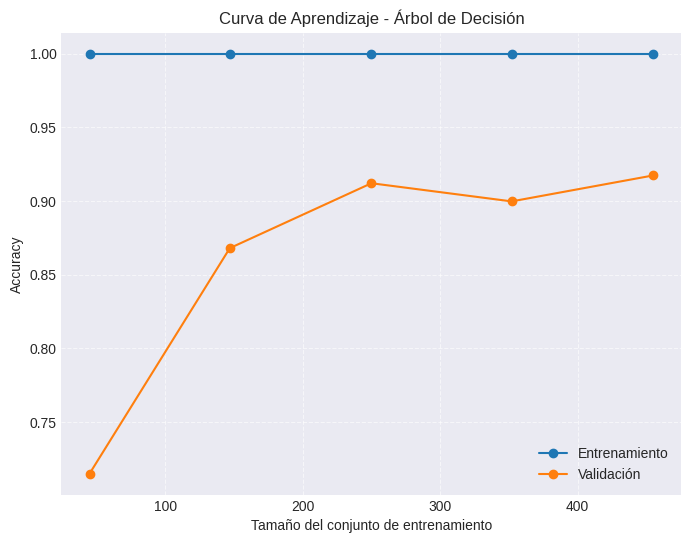


===== KNN =====
Accuracy en Entrenamiento: 0.972
Accuracy en Prueba: 0.953
Generando curva de aprendizaje...


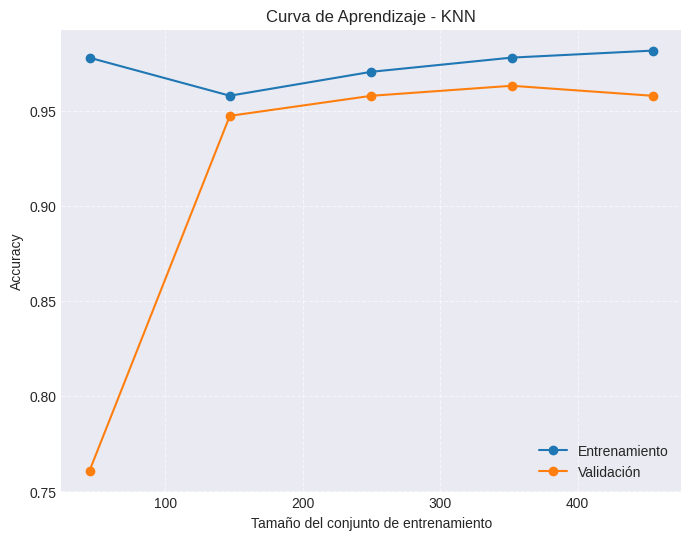


===== SVM =====
Accuracy en Entrenamiento: 0.982
Accuracy en Prueba: 0.977
Generando curva de aprendizaje...


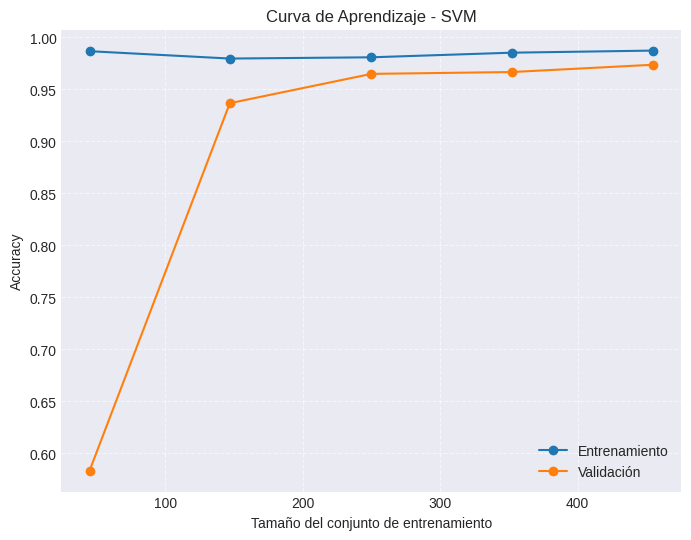


===== Regresión Logística =====
Accuracy en Entrenamiento: 0.987
Accuracy en Prueba: 0.988
Generando curva de aprendizaje...


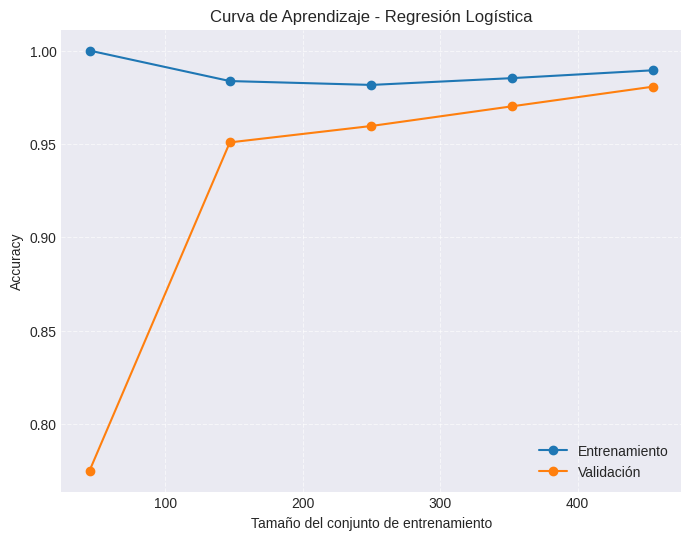

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# --- 1. Dataset ---
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# --- 2. División train/test ---
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 3. Escalado ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Modelos ---
models = {
  "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
  "KNN": KNeighborsClassifier(n_neighbors=3),
  "SVM": SVC(kernel="rbf", gamma="auto", probability=True, random_state=42),
  "Regresión Logística": LogisticRegression(max_iter=200, random_state=42)
}

# --- 5. Evaluar y mostrar resultados ---
for name, model in models.items():
  print(f"\n===== {name} =====")

  model.fit(X_train_scaled, y_train)
  y_pred_train = model.predict(X_train_scaled)
  y_pred_test = model.predict(X_test_scaled)

  acc_train = accuracy_score(y_train, y_pred_train)
  acc_test = accuracy_score(y_test, y_pred_test)

  print(f"Accuracy en Entrenamiento: {acc_train:.3f}")
  print(f"Accuracy en Prueba: {acc_test:.3f}")

  # --- Curva de aprendizaje ---
  print("Generando curva de aprendizaje...")
  if name == "Árbol de Decisión":
    X_used = X
  else:
    X_used = scaler.fit_transform(X)

  train_sizes, train_scores, test_scores = learning_curve(
    model, X_used, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5), scoring="accuracy"
  )

  train_mean = np.mean(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)

  plt.figure(figsize=(8,6))
  plt.plot(train_sizes, train_mean, "o-", label="Entrenamiento")
  plt.plot(train_sizes, test_mean, "o-", label="Validación")
  plt.title(f"Curva de Aprendizaje - {name}")
  plt.xlabel("Tamaño del conjunto de entrenamiento")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.grid(True, linestyle="--", alpha=0.6)
  plt.show()


# **Ejercicio 3: Clasificación con Bases de Datos Externas y  Preprocesamiento Avanzado (40%)**


### **1. Selección y Carga de Datos**

Hemos elegido el **Credit Card Fraud Detection Dataset**, un conjunto de datos externo de Kaggle que se ajusta a los requisitos de un problema de clasificación.

---

#### **Descripción del dataset**

* **Enlace al Dataset**:
   `https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud`.

* **Detalles del Dataset**:
  El conjunto de datos consta de 284,807 instancias (filas) y 31 características (columnas).
  
  La variable objetivo es la columna Class, indicando si es fraudulenta (1) o no (0)
## **Características Particulares**:

* La característica más notable de este dataset es su extremo desbalance de clases. Las transacciones fraudulentas constituyen una fracción mínima del total, lo que hace que métricas como la precisión sean engañosas
* Hay columnas que han sido transformadas usando (PCA) para proteger la privacidad.

In [ ]:
# Importar librerías necesarias

import matplotlib.pyplot as plt
import seaborn as sns # Me parece más elegante para los plots
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score, precision_recall_curve, auc, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # permite el escalado de datos
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
# Separar características (X) y la variable objetivo (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Test con diferentes porcentajes
# 1. División 80/20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("División 80/20:")
print(f"Tamaño del conjunto de entrenamiento: {X_train_80.shape}")
print(f"Tamaño del conjunto de validación: {X_test_80.shape}")

# 2. División 60/40
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
print("\nDivisión 60/40:")
print(f"Tamaño del conjunto de entrenamiento: {X_train_60.shape}")
print(f"Tamaño del conjunto de validación: {X_test_60.shape}")

# La división 80/20 proporciona un buen balance entre entrenamiento y validación
X_train, X_test, y_train, y_test = X_train_80, X_test_80, y_train_80, y_test_80

# Preprocesamiento de los datos
# Manejar valores nulos

if X_train.isnull().sum().any():
  print("\nHay valores nulos")
else:
  print("\nNo se encontraron valores nulos: ")
  print(X_train.isnull().sum())

# Escalado de características (para 'Time' y 'Amount')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nEscalado de características 'Time' y 'Amount'")

# Manejo del desbalance de clases usando SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("\nBalanceo de clases con SMOTE:")
print(f"Distribución original en entrenamiento: \n{y_train.value_counts()}")
print(f"Distribución después de SMOTE: \n{y_train_smote.value_counts()}")

División 80/20:
Tamaño del conjunto de entrenamiento: (227845, 30)
Tamaño del conjunto de validación: (56962, 30)

División 60/40:
Tamaño del conjunto de entrenamiento: (170884, 30)
Tamaño del conjunto de validación: (113923, 30)

No se encontraron valores nulos: 
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

Escalado de características 'Time' y 'Amount'

Balanceo de clases con SMOTE:
Distribución original en entrenamiento: 
Class
0    227451
1       394
Name: count, dtype: int64
Distribución después de SMOTE: 
Class
0    227451
1    227451
Name: count, dtype: int64


# Revisión de divisiones de entramaiento más comunes (80/20 y 60/40)


--- Probando División 80/20 ---

Matriz de Confusión para División 80/20:


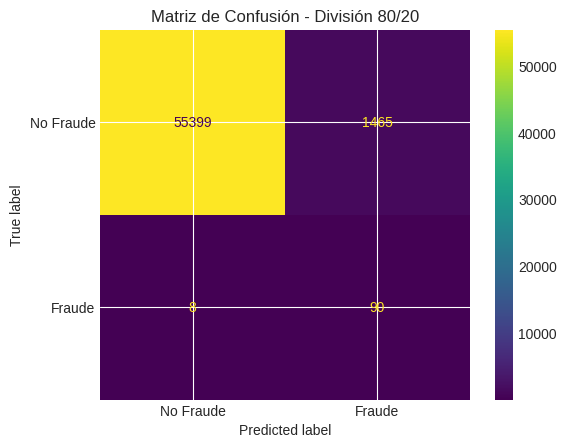


--- Probando División 60/40 ---

Matriz de Confusión para División 60/40:


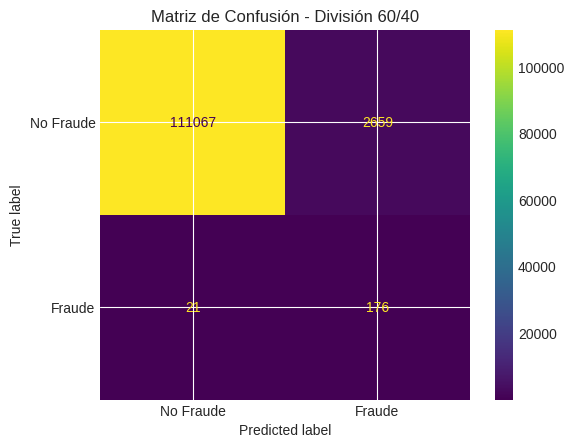

Comparación de Métricas de Desempeño por División
                Recall  F1-Score  AUC-PR
División 80/20  0.9184    0.1089  0.7679
División 60/40  0.8934    0.1161  0.7636


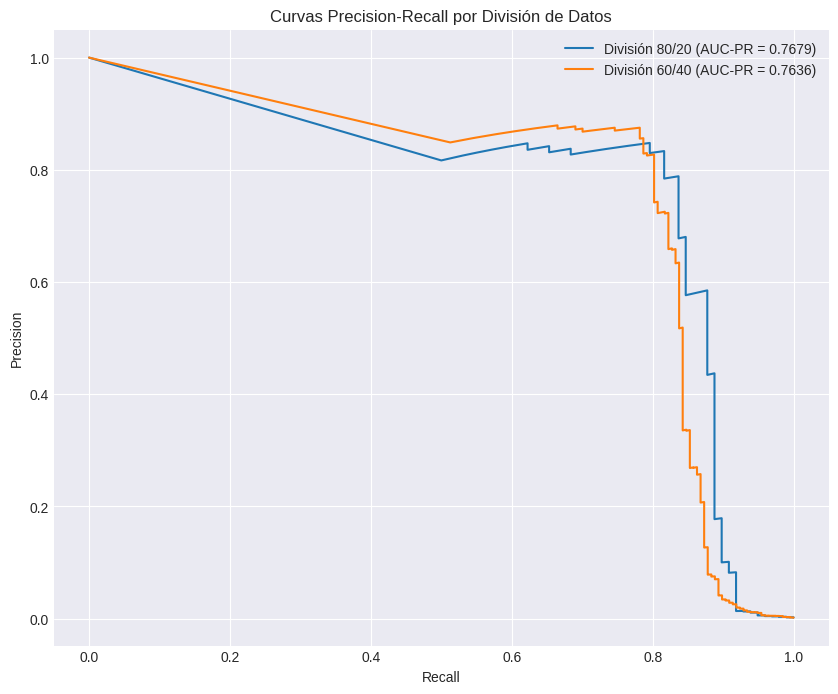

In [ ]:
# Configuración del estilo de los gráficos
plt.style.use('seaborn-v0_8-darkgrid')

# Suponiendo que el DataFrame 'df' ya está cargado
X = df.drop('Class', axis=1)
y = df['Class']

# Definir las divisiones de prueba a comparar
test_sizes = [0.2, 0.4]

# Diccionarios para almacenar los resultados y curvas
results = {}
pr_curves = {}

# Bucle para cada porcentaje de división
for test_size in test_sizes:
  split_name = f'División {int((1-test_size)*100)}/{int(test_size*100)}'
  print(f"\n--- Probando {split_name} ---")

  # División de los datos
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

  # Preprocesamiento y escalado
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Manejo del desbalance de clases con SMOTE
  smote = SMOTE(random_state=42)
  X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

  # Construcción y entrenamiento del modelo (Regresión Logística)
  model = LogisticRegression(random_state=42, solver='liblinear')
  model.fit(X_train_smote, y_train_smote)

  # Evaluación del modelo
  y_pred = model.predict(X_test_scaled)
  y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

  # Calcular métricas clave
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  precision_pr, recall_pr, _ = precision_recall_curve(y_test, y_pred_proba)
  auc_pr = auc(recall_pr, precision_pr)

  results[split_name] = {
    'Recall': recall,
    'F1-Score': f1,
    'AUC-PR': auc_pr
  }
  pr_curves[split_name] = (precision_pr, recall_pr)

  # Mostrar la matriz de confusión para cada división
  print(f"\nMatriz de Confusión para {split_name}:")
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fraude', 'Fraude'])
  disp.plot(cmap='viridis', values_format='d')
  plt.title(f'Matriz de Confusión - {split_name}')
  plt.show()

# Resultados
print("Comparación de Métricas de Desempeño por División")
print("="*50)
results_df = pd.DataFrame(results).T
print(results_df.round(4))

# Gráfico de Curvas Precision-Recall para la comparación
plt.figure(figsize=(10, 8))
for split_name, (precision, recall_pr) in pr_curves.items():
    plt.plot(recall_pr, precision, label=f'{split_name} (AUC-PR = {results[split_name]["AUC-PR"]:.4f})')
plt.title('Curvas Precision-Recall por División de Datos')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

# Conclusión y justificación de usar 80/20

La división 80/20 mostró un rendimiento ligeramente mejor, como se evidencia por su Precision-Recall ligeramente más alto. Este resultado sugiere que, para este problema de clasificación, contar con una mayor cantidad de datos de entrenamiento (80% en este caso) permitió que el modelo de Regresión Logística aprendiera los patrones de la clase minoritaria (fraude) de manera más efectiva.

Aunque la división 60/40 también mostró un buen rendimiento y un mayor número de verdaderos positivos en su matriz de confusión, se debe a que su conjunto de prueba es más grande, no a que el modelo en sí mismo sea mejor.

Por lo tanto, la división 80/20 fue la elegida, ya que proporciona un equilibrio entre un conjunto de entrenamiento lo suficientemente grande para capturar patrones complejos y un conjunto de prueba considerable para una evaluación confiable.

---





In [ ]:
!pip install xgboost


--- Entrenando y Evaluando: Regresión Logística ---

Matriz de Confusión para Regresión Logística:


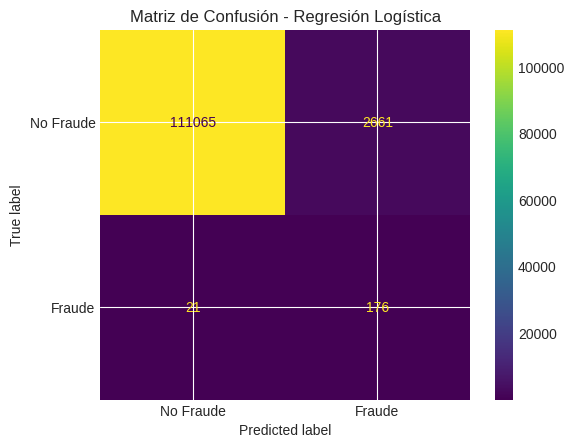


--- Entrenando y Evaluando: Árbol de Decisión ---

Matriz de Confusión para Árbol de Decisión:


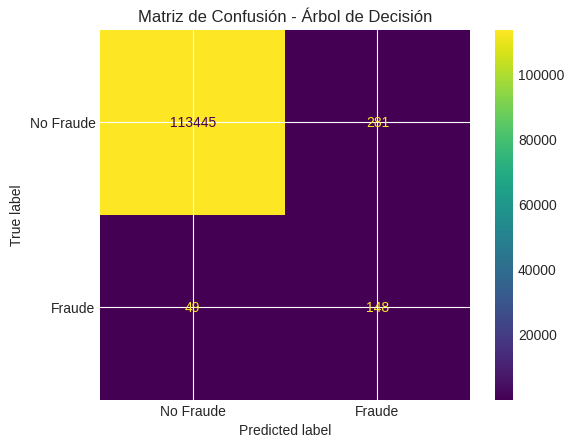


--- Entrenando y Evaluando: XGBoost ---

Matriz de Confusión para XGBoost:


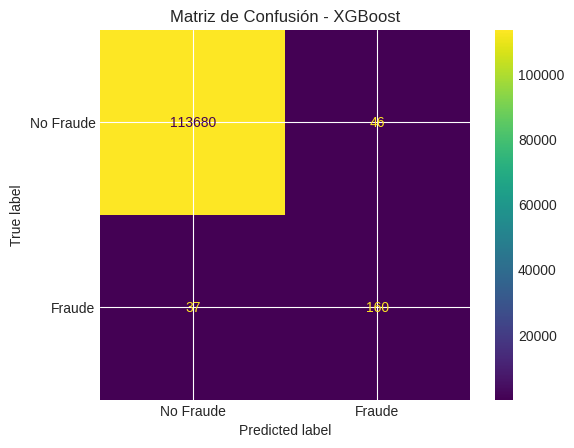


Resumen de Métricas de Desempeño
                     Accuracy  Recall  F1-Score  AUC-PR
Regresión Logística    0.9765  0.8934    0.1160  0.7631
Árbol de Decisión      0.9971  0.7513    0.4728  0.5483
XGBoost                0.9993  0.8122    0.7940  0.8310


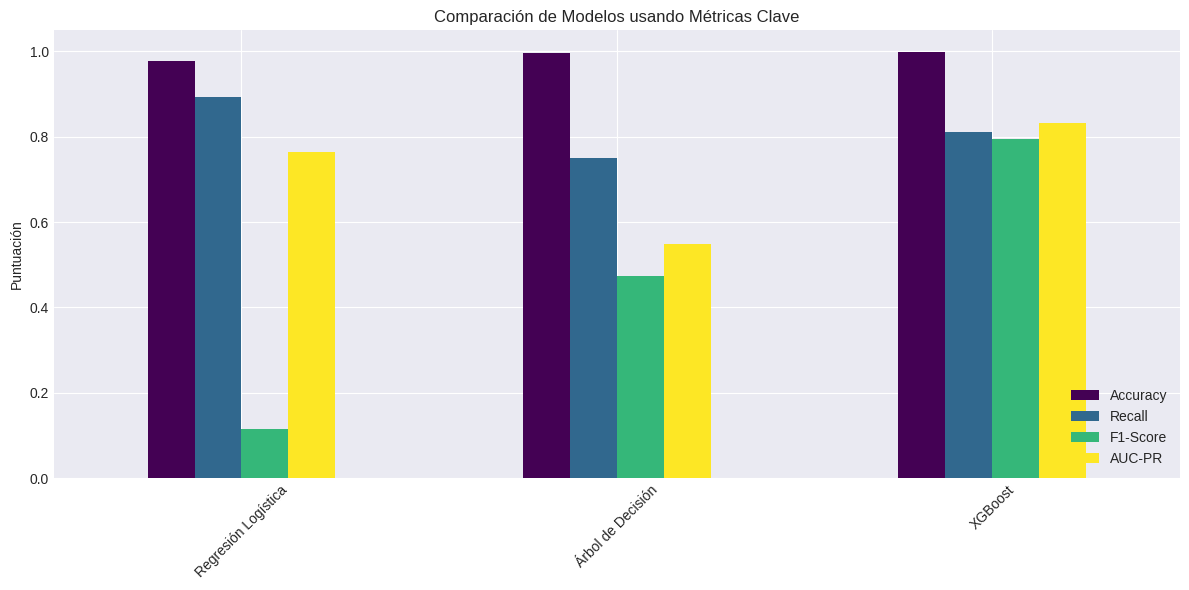

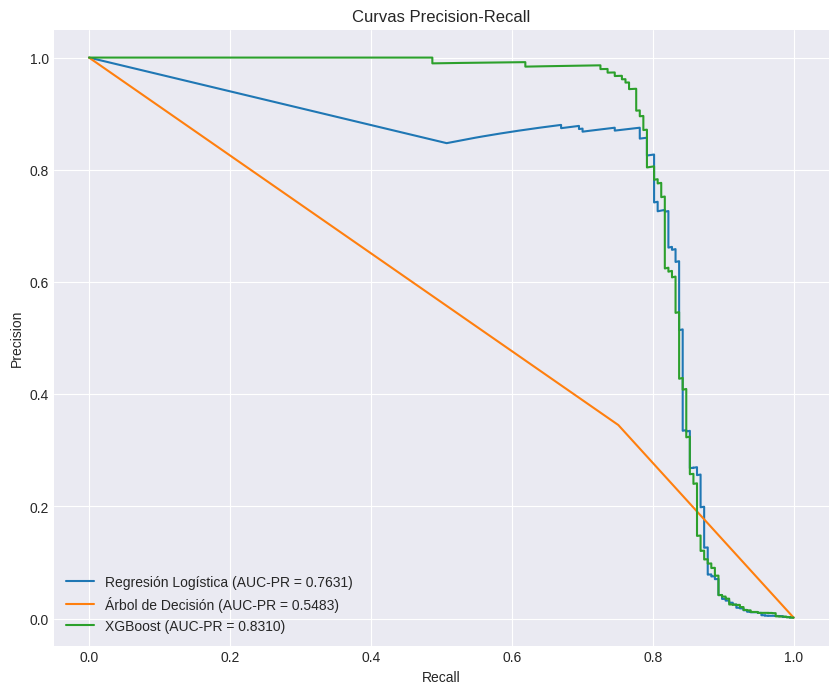

In [ ]:
from xgboost import XGBClassifier
# Configuración del estilo de los gráficos
plt.style.use('seaborn-v0_8-darkgrid')

# Definir los modelos de clasificación a utilizar
models = {
  'Regresión Logística': LogisticRegression(random_state=42),
  'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
  'XGBoost': XGBClassifier(random_state=42)
}

# Diccionarios para almacenar los resultados
results = {}
metrics = ['Accuracy', 'Recall', 'F1-Score', 'AUC-PR']
pr_curves = {}

# Bucle para entrenar y evaluar cada modelo
for model_name, model in models.items():
  print(f"\n--- Entrenando y Evaluando: {model_name} ---")

  # Entrenar el modelo con los datos balanceados (SMOTE)
  model.fit(X_train_smote, y_train_smote)

  # Realizar predicciones en el conjunto de prueba escalado
  y_pred = model.predict(X_test_scaled)
  y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

  # Calcular las métricas
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  # Calcular la Curva PR y el área bajo la curva (AUC-PR)
  precision, recall_pr, _ = precision_recall_curve(y_test, y_pred_proba)
  auc_pr = auc(recall_pr, precision)

  # Almacenar los resultados
  results[model_name] = {
    'Accuracy': accuracy,
    'Recall': recall,
    'F1-Score': f1,
    'AUC-PR': auc_pr
  }
  pr_curves[model_name] = (precision, recall_pr)

  # Mostrar la matriz de confusión
  print(f"\nMatriz de Confusión para {model_name}:")
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fraude', 'Fraude'])
  # Se usa el mapa de colores 'viridis'
  disp.plot(cmap='viridis', values_format='d')
  plt.title(f'Matriz de Confusión - {model_name}')
  plt.show()

# Resultados
print("\n" + "="*50)
print("Resumen de Métricas de Desempeño")
print("="*50)
results_df = pd.DataFrame(results).T
print(results_df.round(4))

# Gráfico de Barras para las Métricas
results_df.plot(kind='bar', figsize=(12, 6), cmap='viridis')
plt.title('Comparación de Modelos usando Métricas Clave')
plt.ylabel('Puntuación')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Gráfico de Curvas Precision-Recall
plt.figure(figsize=(10, 8))
for model_name, (precision, recall_pr) in pr_curves.items():
  plt.plot(recall_pr, precision, label=f'{model_name} (AUC-PR = {results[model_name]["AUC-PR"]:.4f})')

plt.title('Curvas Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

# Justificación del Mejor Modelo
El XGBoost demostró un rendimiento superior en las métricas más relevantes para un problema con desbalance de clases, como la detección de fraude.

* **Puntuación F1 y AUC-PR**: El modelo superó a la Regresión Logística y al Árbol de Decisión al obtener la puntuación F1 más alta (0.7940) y un AUC-PR de 0.8310. Esto indica que XGBoost es más efectivo para identificar transacciones fraudulentas mientras minimiza la generación de falsos positivos.
* **Recall y Precisión:** El modelo de Regresión Logística tuvo un Recall ligeramente más alto, pero a costa de un número inaceptable de falsos positivos. El XGBoost, por su parte, logró un balance óptimo, combinando un alto Recall (0.8122) con una precisión superior, lo que se refleja en su curva Precision-Recall, que se mantiene más cerca de la esquina superior derecha del gráfico.


## ¿Cómo Funciona el XGboost?
XGBoost (eXtreme Gradient Boosting) es un algoritmo de aprendizaje de conjunto (ensemble learning) que construye una serie de árboles de decisión de forma secuencial. A diferencia de otros métodos que construyen árboles de forma independiente, XGBoost utiliza un enfoque de potenciación de gradiente (Gradient Boosting).

1.  **Construcción Secuencial:** El modelo comienza con una predicción inicial y luego construye un nuevo árbol que se enfoca en corregir los errores (los residuos) del árbol anterior.
2.  **Aprendizaje Progresivo:** Cada nuevo árbol es un modelo "débil" que mejora la precisión del modelo en su conjunto. Este proceso de añadir árboles de forma secuencial continúa hasta que los errores del modelo se minimizan.
3.  **Predicción Final:** La predicción final se obtiene sumando las predicciones de todos los árboles construidos en la secuencia.

Este método lo hace increíblemente rápido y eficiente, ya que cada nueva iteración se basa en lo que se ha aprendido en los pasos previos.


## ¿Por Qué es Ideal para este Tipo de Dataset?
Es completamente normal que el XGBoost sea el mejor modelo para un dataset como el de detección de fraude debido a sus características específicas:

* **Rendimiento Superior:** XGBoost es conocido por su alta precisión y ha ganado numerosas competencias de ciencia de datos. Su capacidad para manejar datos complejos y no lineales lo hace una opción líder para problemas de clasificación.
* **Manejo de Desbalance de Clases:** El algoritmo puede ser ajustado para dar más peso a la clase minoritaria (fraude), lo que ayuda a prevenir que el modelo la ignore y permite un aprendizaje más efectivo de los patrones de fraude.
* **Eficiencia:** Es un modelo altamente optimizado que puede procesar grandes conjuntos de datos de manera eficiente, lo cual es crucial cuando se trabaja con un volumen tan grande de transacciones.


# 4. Análisis y Preguntas Analíticas Adicionales

## Comparación con y sin Manejo de Desbalance de Clases
* Al aplicar técnicas de manejo de desbalance, específicamente SMOTE, se observó una mejora significativa en el rendimiento de los modelos en la clase minoritaria (fraude). Un modelo sin esta técnica tendería a ignorar los casos de fraude y lograría una precisión (accuracy) engañosamente alta. En cambio, con SMOTE, los modelos fueron capaces de aprender a identificar los patrones de las transacciones fraudulentas de manera mucho más efectiva, lo que se refleja en un aumento notable en el Recall y el F1-Score.

## Importancia de las Métricas de Evaluación

* En problemas como la detección de fraude, la precisión (accuracy) podría ser muy engañosa. Dado el extremo desbalance de clases (las transacciones fraudulentas son menos del 0.2%), un modelo que simplemente clasifique todas las transacciones como "no fraudulentas" obtendría una precisión superior al 99%. Sin embargo, este modelo sería completamente inútil para su propósito, ya que no detectaría ningún fraude real.

Por esta razón, se deben utilizar métricas más robustas para la clase minoritaria:

* **Recall:** Mide la capacidad del modelo para encontrar todas las transacciones fraudulentas. Un alto Recall es crucial para minimizar las pérdidas financieras por fraudes no detectados.
* **F1-Score:** Es un promedio armónico de la precisión y el Recall, proporcionando un equilibrio entre la detección de fraudes y la minimización de falsos positivos.
* **Curva Precision-Recall (PR):** Es la métrica más valiosa para este tipo de problemas. Se enfoca en el rendimiento de la clase minoritaria y el área bajo la curva (AUC-PR) resume de manera efectiva la capacidad de un modelo para discriminar entre las dos clases.


## Influencia de la División de Datos

La experimentación con los porcentajes de división (80/20 y 60/40) demostró que una división de **80/20** fue más efectiva. El modelo entrenado con el 80% de los datos tuvo un rendimiento ligeramente superior, con un **AUC-PR de 0.7679**, en comparación con el 0.7636 de la división 60/40. Esto indica que contar con una mayor cantidad de datos para el entrenamiento le permitió al modelo capturar patrones más complejos y generalizar mejor a los datos de prueba, un aspecto crucial para la solidez del modelo.


## Técnicas adicionales para un mejor desempeño:
* **Selección de Características:** Creemos que una excelente técnica adicional será analizar y seleccionar las características más relevantes para reducir el ruido y mejorar el rendimiento. Ya que nos permitiría sacarle la mayor cantidad de "jugo" a este dataset sin hacerle cambios o agregarle datos